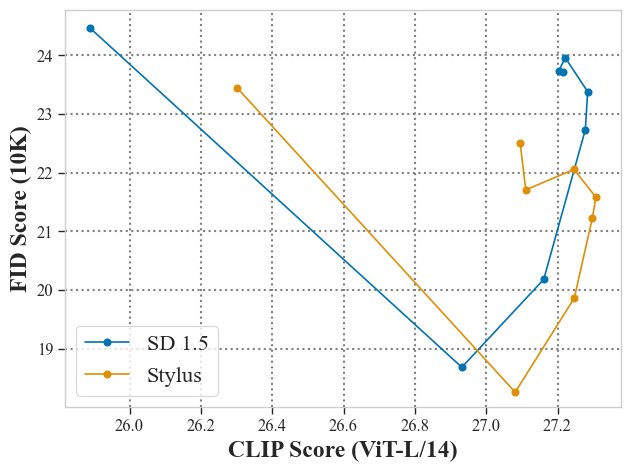

In [14]:
from matplotlib import pyplot as plt 
import matplotlib
import seaborn as sns
import pandas as pd
from pathlib import Path

color_palette = sns.color_palette("colorblind")
matplotlib.rc('font', serif='cm10')
matplotlib.rc('mathtext', fontset='cm')
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette("colorblind")
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "Times New Roman"
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.grid(
    color='grey',
    linestyle='dotted',
    linewidth=1.5,
)
results = Path("~/coco_output/pareto.csv")
df = pd.read_csv(results)

data = df.sort_values(by=["cfg"])
data = data[data['cfg']!=0.25]
data = data[data['cfg']!=0.5]

normal = data[data["alg"] == "normal"]
lora = data[data["alg"] == "lora"]
plt.plot(normal["clip"], normal["fid"],label = "SD 1.5", marker='o' )
plt.plot( lora['clip'], lora["fid"],label = "Stylus", marker='o')

plt.ylabel("FID Score (10K)", fontsize=17, fontweight='bold')
plt.xlabel("CLIP Score (ViT-L/14)", fontsize=17, fontweight='bold')
#plt.title("FID vs CLIP Scores over COCO (2k)", fontsize=17)
plt.ylim(bottom=18.01)
plt.legend(fontsize=16, loc='lower left')
plt.tight_layout()
plt.savefig('figures/pareto.pdf', format="pdf", dpi=300, bbox_inches='tight')